In [78]:
import pandas as pd
import glob as glob
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nbpresent

In [2]:
test=pd.read_table('tara-analyses/ERP001736_taxonomy_abundances_v2.0.tsv')
splitGenus=test['#SampleID'].str.split(';', expand=True)
splitGenus.columns=['Root', 'k', 'p', 'c', 'o', 'f', 'g', 's']
splitGenus=splitGenus.T.drop('Root').T
Tara_taxonomy = splitGenus.join(test).T.drop('#SampleID').T
Tara_taxonomy.columns[Tara_taxonomy.columns.str.startswith('ERR')]

Index(['ERR164407', 'ERR164408', 'ERR164409', 'ERR315858', 'ERR315859',
       'ERR315860', 'ERR315861', 'ERR315862', 'ERR315863', 'ERR318618',
       ...
       'ERR599167', 'ERR599168', 'ERR599169', 'ERR599170', 'ERR599171',
       'ERR599172', 'ERR599173', 'ERR599174', 'ERR599175', 'ERR599176'],
      dtype='object', length=248)

In [ ]:
Genus_Tara_taxonomy=Tara_taxonomy.iloc[:,5:].groupby('g').sum()
Genus_Tara_taxonomy=Genus_Tara_taxonomy.T.drop('s').T
Genus_Tara_taxonomy.loc['sum']=Genus_Tara_taxonomy.sum()
Genus_Tara_taxonomy['sum']=Genus_Tara_taxonomy.sum(axis=1)
Genus_Tara_taxonomy=Genus_Tara_taxonomy.sort('sum',ascending=False).sort('sum',axis=1, ascending=False).drop('sum').T.drop('sum').T

In [3]:
ERRList=Tara_taxonomy.columns[Tara_taxonomy.columns.str.startswith('ERR')]
import os

sbt_gather=pd.DataFrame(columns=ERRList, dtype='float')

for ERRfile in glob.glob('sourmash-sigs/abundtrim/sbt_gather/*microbes'):
    ERRname= ERRfile.split('/')[3].split('_')[0]
    if ERRname in ERRList:
        if os.stat(ERRfile).st_size > 0:
            with open(ERRfile) as f:
                next(f)
                for line in f:
                    line=line.strip().split(' ')
                    percent=float(line[0])
                    NC=line[1]
                    genus = line[2]
                    if genus in sbt_gather.index:
                        if sbt_gather.loc[genus, ERRname] > 0:
                            sbt_gather.loc[genus, ERRname] += percent
                        else:
                            sbt_gather.loc[genus, ERRname] = percent
                    else:
                        sbt_gather.loc[genus, ERRname] = percent

sbt_gather.loc['sum']=sbt_gather.sum()
sbt_gather=sbt_gather.sort('sum', axis=1, ascending=False)
sbt_gather['sum2']=sbt_gather.sum(axis=1)
sbt_gather=sbt_gather.sort('sum2', ascending=False)
sbt_gather=sbt_gather.drop('sum').T.drop('sum2').T



//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:26: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:28: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


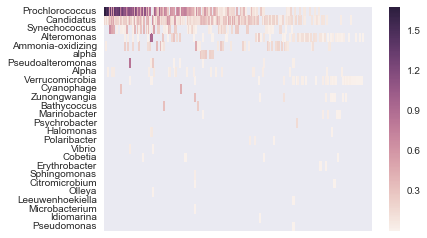

In [64]:
hm=sns.heatmap(sbt_gather)
hm.set_xticklabels('')


In [66]:
sbt_gather.columns

Index(['ERR599041', 'ERR599153', 'ERR599054', 'ERR599094', 'ERR599045',
       'ERR599145', 'ERR599075', 'ERR599134', 'ERR599026', 'ERR599049',
       ...
       'ERR599125', 'ERR599109', 'ERR164409', 'ERR599172', 'ERR598987',
       'ERR599037', 'ERR599099', 'ERR599147', 'ERR164408', 'ERR164407'],
      dtype='object', length=248)

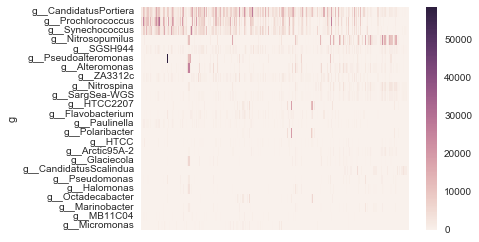

In [68]:
Genus_Tara_taxonomy=Genus_Tara_taxonomy.astype('float')
hm=sns.heatmap(Genus_Tara_taxonomy.iloc[1:25][sbt_gather.columns])
hm.set_xticklabels('')
hm.figure.savefig('Tara_taxonomy.png')

In [77]:
Tara_taxonomy.lookup('Pseu')

<bound method DataFrame.lookup of                 k                 p                  c                     o  \
0            None              None               None                  None   
1      k__Archaea  p__Crenarchaeota            c__MBGA                   o__   
2      k__Archaea  p__Crenarchaeota            c__MBGA              o__NRP-J   
3      k__Archaea  p__Crenarchaeota            c__MBGB                   o__   
4      k__Archaea  p__Crenarchaeota             c__MCG                   o__   
5      k__Archaea  p__Crenarchaeota             c__MCG                o__B10   
6      k__Archaea  p__Crenarchaeota             c__MCG            o__pGrfC26   
7      k__Archaea  p__Crenarchaeota           c__THSCG                   o__   
8      k__Archaea  p__Crenarchaeota  c__Thaumarchaeota               o__AK31   
9      k__Archaea  p__Crenarchaeota  c__Thaumarchaeota      o__Cenarchaeales   
10     k__Archaea  p__Crenarchaeota  c__Thaumarchaeota      o__Cenarchaeales   
11    